In [25]:
# Data Analysis and Wrangling 
import pandas as pd 
import numpy as np
import random as rnd

# Visualization 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

# Machine Learning 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron 
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.cross_validation import KFold

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
path1 = '../Cleaned-Data/Training Data.xlsx'
path2 = '../Cleaned-Data/Testing Data.xlsx'

In [3]:
df_training = pd.read_excel(path1)
df_testing = pd.read_excel(path2)

In [4]:
df_training.head()

,Average GPA,Placed 1/0,Coding,Logical
0,3.400,1,44.86,31.48
1,1.328,0,55.83,52.72
2,2.492,0,68.49,34.38
3,4.736,1,32.90,58.17
4,3.058,0,43.47,17.39


### Create a function for classification model

In [20]:
def classification_model(model, data, predictors, outcome): 
    # Fit the model
    model.fit(data[predictors], data[outcome])
    
    # Make predictions on training set: 
    predictions = model.predict(data[predictors])
    
    #print accuracy 
    accuracy = metrics.accuracy_score(predictions, data[outcome])
    print "Accuracy : %s" % '{0: .3%}'.format(accuracy)
    
    # Perform k-fold validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
        
        # The target we're using to train the algorithm
        train_target = data[outcome].iloc[train]
        
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
        
        # Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
        
    print 'Cross-Validation Score: %s' % '{0: .3%}'.format(np.mean(error))
        
    # Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors], data[outcome])

In [26]:
outcome_var = 'Placed 1/0'
model = LogisticRegression()
predictor_var = ['Average GPA','Coding','Logical']
classification_model(model, df_training, predictor_var, outcome_var)

Accuracy :  66.667%
Cross-Validation Score:  65.608%


### ------------- Yet to work on above part --------------

In [5]:
X_train = df_training.drop('Placed 1/0', axis=1)
Y_train = df_training['Placed 1/0']
X_test = df_testing.copy()
X_train.shape, Y_train.shape, X_test.shape

((282, 3), (282,), (134, 3))

In [6]:
# Logistic Regression 

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

66.67

In [7]:
# Support Vector Machine 

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred1 = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

99.29

In [8]:
# KNN 

knn = KNeighborsClassifier(n_neighbors = 281)
knn.fit(X_train, Y_train)
Y_pred2 = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

52.48

In [9]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred3 = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [10]:
prediction = pd.DataFrame({
        "Placed": Y_pred3 #Decision Tree 
    })

In [11]:
prediction.head()

,Placed
0,0
1,0
2,0
3,1
4,1


In [12]:
path3 = '../Cleaned-Data/2018-Passouts/2018_merged.xlsx'

In [13]:
df_2018 = pd.read_excel(path3)

In [14]:
df_merge = pd.concat([df_2018, prediction], axis=1)

In [15]:
df_merge

,Name,Gender,M3-TH,M3-IA,M3-TW,DIS-TH,DIS-IA,OOPM-TH,OOPM-IA,OOPM-TW,...,MCC-TH,MCC-IA,MCC-TW,MCC-PR,ELECTIVE - I-TW,NPL-TW,NPL-PR,P/F.3,GPA-6,Placed
0,PRASAD ABHISHEK,0,23,10,18,36,14,19,14,19,...,37,8,16,12,38,19,40,P,6.08,0
1,AGAWANE SANDESH VISHWANATH,0,37,8,18,25,15,50,16,20,...,37,8,18,15,43,16,42,P,6.96,0
2,AHER PARESH RAJU,0,21,9,16,60,16,48,20,22,...,55,8,18,16,38,18,44,P,8.21,0
3,BADHE SAGAR VIJAY,0,17,10,18,48,16,36,18,21,...,56,10,20,20,38,19,40,P,7.92,1
4,BAGWE CHAITALI SUHAS,1,56,19,20,62,20,61,20,24,...,58,15,24,24,47,20,42,P,9.33,1
5,BANAVALIKAR KAMAKSHI PRATHAMESH,1,33,12,20,55,18,53,20,24,...,61,10,23,21,46,19,41,P,9.00,0
6,BANDOPADHYAY SAPTARSHI SUBRATA,0,36,17,20,47,18,55,18,22,...,50,12,20,21,45,22,39,P,8.17,1
7,BARI APEKSHA PRAKASH,1,34,12,22,50,17,52,20,23,...,56,13,24,21,40,19,42,P,8.33,1
8,BHAGAT APURVA SANJAY,0,23,12,22,42,16,51,19,22,...,50,11,24,21,40,20,40,P,8.17,1
9,BHAT AKSHATA UDAY,1,36,15,20,54,19,46,20,20,...,45,11,22,24,46,22,41,P,8.00,0


In [16]:
df_merge.to_excel('../Cleaned-Data/2018_Prediction.xlsx', index=False)

In [17]:
df_merge.insert(0, 'New_ID', range(0,len(df_merge)))
df_merge

,New_ID,Name,Gender,M3-TH,M3-IA,M3-TW,DIS-TH,DIS-IA,OOPM-TH,OOPM-IA,...,MCC-TH,MCC-IA,MCC-TW,MCC-PR,ELECTIVE - I-TW,NPL-TW,NPL-PR,P/F.3,GPA-6,Placed
0,0,PRASAD ABHISHEK,0,23,10,18,36,14,19,14,...,37,8,16,12,38,19,40,P,6.08,0
1,1,AGAWANE SANDESH VISHWANATH,0,37,8,18,25,15,50,16,...,37,8,18,15,43,16,42,P,6.96,0
2,2,AHER PARESH RAJU,0,21,9,16,60,16,48,20,...,55,8,18,16,38,18,44,P,8.21,0
3,3,BADHE SAGAR VIJAY,0,17,10,18,48,16,36,18,...,56,10,20,20,38,19,40,P,7.92,1
4,4,BAGWE CHAITALI SUHAS,1,56,19,20,62,20,61,20,...,58,15,24,24,47,20,42,P,9.33,1
5,5,BANAVALIKAR KAMAKSHI PRATHAMESH,1,33,12,20,55,18,53,20,...,61,10,23,21,46,19,41,P,9.00,0
6,6,BANDOPADHYAY SAPTARSHI SUBRATA,0,36,17,20,47,18,55,18,...,50,12,20,21,45,22,39,P,8.17,1
7,7,BARI APEKSHA PRAKASH,1,34,12,22,50,17,52,20,...,56,13,24,21,40,19,42,P,8.33,1
8,8,BHAGAT APURVA SANJAY,0,23,12,22,42,16,51,19,...,50,11,24,21,40,20,40,P,8.17,1
9,9,BHAT AKSHATA UDAY,1,36,15,20,54,19,46,20,...,45,11,22,24,46,22,41,P,8.00,0


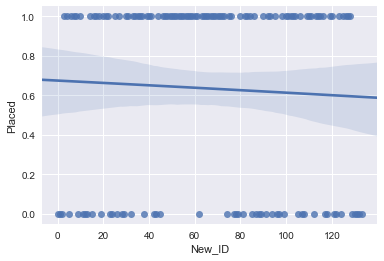

In [18]:
import seaborn as sns
sns.regplot(x = df_merge['New_ID'], y = df_merge['Placed'], data=df_merge, logistic=True)